### PROBLEM

Return to your Ames Data.  We have covered a lot of ground today, so let's summarize the things we could do to improve the performance of our original model that compared the Above Ground Living Area to the Logarithm of the Sale Price.
<div class="alert alert-info" role="alert">
1. Clean data, drop missing values
2. Transform data, code variables using either ordinal values or OneHotEncoder methods
3. Create more features from existing features
4. Split our data into testing and training sets
5. Normalize quantitative features
6. Use Regularized Regression methods and Polynomial regression to improve performance of model
</div>
Can you use some or all of these ideas to improve upon your initial model?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import pandas_profiling

import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/sankokohtet/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/sankokohtet/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/ipyke

In [2]:
ames = pd.read_csv('data/ames_housing.csv')

In [3]:
pandas_profiling.ProfileReport(ames)

Number of variables,81
Number of observations,1460
Total Missing (%),5.9%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,38
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [4]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
ames['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [7]:
ames['Alley'] = ames['Alley'].fillna("None")

In [8]:
ames['Alley'].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [9]:
ames['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [10]:
ames['FireplaceQu'] = ames['FireplaceQu'].fillna("None")

In [11]:
ames['FireplaceQu'].value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [12]:
ames['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [13]:
ames['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [14]:
ames ['OverallGrade'] = ames['OverallCond'] * ames['OverallQual']

In [15]:
ames ['OverallGrade'].value_counts()

35    336
30    284
40    177
25    142
42     94
36     84
20     65
45     46
48     37
24     31
49     23
28     22
16     20
56     15
50     15
18     12
12     11
63      9
15      9
6       4
72      3
32      3
9       3
54      3
10      2
90      2
21      2
64      2
60      1
8       1
3       1
1       1
Name: OverallGrade, dtype: int64

In [16]:
ames['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [17]:
ames = ames.replace({"BsmtQual": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}})

In [18]:
ames['BsmtQual'].value_counts()

3.0    649
4.0    618
5.0    121
2.0     35
Name: BsmtQual, dtype: int64

In [19]:
ames['BsmtCond'] = ames['BsmtCond'].fillna("None")

In [20]:
ames['BsmtCond'].value_counts()

TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64

In [21]:
ames = ames.replace({"BsmtCond": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}})

In [22]:
ames['BsmtCond'].value_counts()

3       1311
4         65
2         45
None      37
1          2
Name: BsmtCond, dtype: int64

In [23]:
ames['BasementOverall'] = ames['BsmtCond'] * ames['BsmtQual']

In [24]:
ames['BasementOverall'].value_counts()

12.0    598
9.0     596
15.0    110
6.0      60
16.0     36
20.0     11
4.0       8
8.0       2
2.0       2
Name: BasementOverall, dtype: int64

In [25]:
ames = ames.replace({"GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})

In [26]:
ames['GarageQual'].value_counts()

3.0    1311
2.0      48
4.0      14
1.0       3
5.0       3
Name: GarageQual, dtype: int64

In [27]:
ames['GarageCond'] = ames['GarageCond'].fillna("None")

In [28]:
ames = ames.replace({"GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})

In [29]:
ames['GarageCond'].value_counts()

3       1326
None      81
2         35
4          9
1          7
5          2
Name: GarageCond, dtype: int64

In [30]:
ames['GarageOverall'] = ames['GarageCond'] * ames['GarageQual']

In [31]:
ames['GarageOverall'].value_counts()

9.0     1291
6.0       39
4.0       20
12.0      15
16.0       4
2.0        4
1.0        3
25.0       2
15.0       1
Name: GarageOverall, dtype: int64

In [32]:
ames['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [33]:
ames['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [34]:
ames['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

In [35]:
ames['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
176000     8
170000     8
129000     8
230000     8
250000     8
200000     8
141000     8
215000     8
148000     7
173000     7
          ..
64500      1
326000     1
277500     1
259000     1
254900     1
131400     1
181134     1
142953     1
245350     1
121600     1
337500     1
228950     1
274000     1
317000     1
154500     1
52000      1
107400     1
218000     1
104000     1
68500      1
94000      1
466500     1
410000     1
437154     1
219210     1
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

In [36]:
ames.corr().SalePrice

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtQual         0.644019
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
GarageQual       0.156693
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold      

In [37]:
corr_mat = ames.corr()

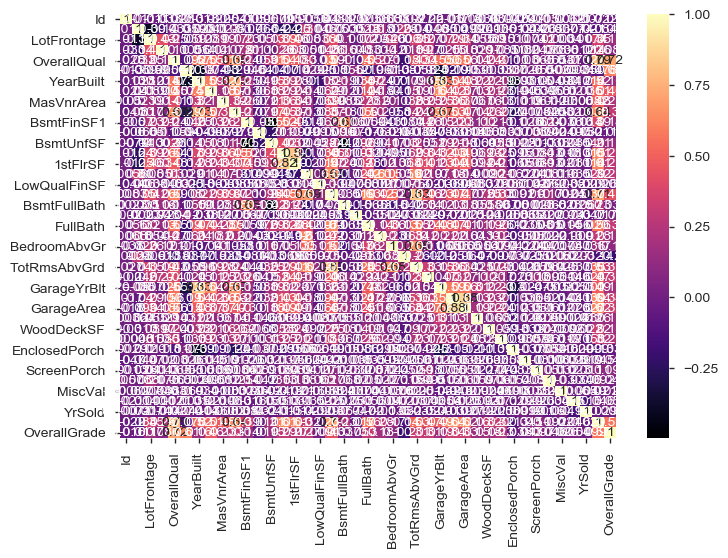

In [38]:
plt.figure()
sns.heatmap(corr_mat, cmap='magma', annot=True)

In [39]:
lr = LinearRegression()
lr.fit(ames[['BedroomAbvGr', 'KitchenAbvGr']], ames.SalePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
Predictions = lr.predict(ames[['BedroomAbvGr', 'KitchenAbvGr']])

In [41]:
mse = mean_squared_error(Predictions, ames.SalePrice)
print("The MSE is {:3f}".format(mse))

The MSE is 5940112144.932455


In [42]:
rmse = np.sqrt(mse)
rmse

77072.12300781946

In [43]:
X = ames[['OverallGrade', 'GrLivArea', 'TotRmsAbvGrd']]
y = ames.SalePrice

In [44]:
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)
mse = mean_squared_error(pred,y)
rmse = np.sqrt(mse)
print(" The MSE is {:.4f}".format(mse), '\nRMSE: {:.4f}'.format(rmse))

 The MSE is 2584910713.4035 
RMSE: 50842.0172


In [45]:
base = DummyRegressor()

In [46]:
base.fit(X,y)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [47]:
base.predict(X)

array([180921.19589041, 180921.19589041, 180921.19589041, ...,
       180921.19589041, 180921.19589041, 180921.19589041])

In [48]:
dum_pred = base.predict(X)
mean_squared_error(dum_pred, y)

6306788585.349299

In [49]:
np.sqrt(mean_squared_error(dum_pred,y))

79415.29188606751

In [50]:
y = ames['SalePrice']
ames = ames.drop('SalePrice', axis = 1)

In [51]:
ames_numeric = ames.select_dtypes(include = 'int64')
ames_numeric.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,OverallGrade
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,35
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,48
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,35
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,35
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,40


In [52]:
std_scaled = StandardScaler()
minmax_scaled = MinMaxScaler()

In [53]:
cols = ames_numeric.columns

In [54]:
std_df = std_scaled.fit_transform(ames[[name for name in cols]])
minmax_df = minmax_scaled.fit_transform(ames[[name for name in cols]])

In [55]:
pd.DataFrame(std_df).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.123216
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,1.533735
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.123216
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,0.123216
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.665723


In [56]:
pd.DataFrame(minmax_df).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.000000,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.125089,0.0,0.064212,...,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.382022
1,0.000685,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.173281,0.0,0.121575,...,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.528090
2,0.001371,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.086109,0.0,0.185788,...,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.382022
3,0.002056,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.038271,0.0,0.231164,...,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.382022
4,0.002742,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.116052,0.0,0.209760,...,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.438202


In [57]:
lm = LinearRegression()

In [58]:
y = np.log(y)

In [59]:
ames_numeric_scaled = std_scaled.fit_transform(ames[[name for name in cols]])

In [60]:
lm.fit(ames_numeric_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
predictions = lm.predict(ames_numeric_scaled)

In [62]:
mse = mean_squared_error(y, predictions)

In [63]:
rmse = np.sqrt(mse)
score = lm.score(ames_numeric_scaled, predictions)

In [64]:
print('R-squared score: {}'.format(score), '\nRMSE: {:.4f}'.format(rmse))

R-squared score: 1.0 
RMSE: 0.1449


In [65]:
X_train, X_test, y_train, y_test = train_test_split(ames_numeric_scaled, y)

In [66]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
pred = lm.predict(X_test)

In [68]:
mse = mean_squared_error(y_test, pred)

In [69]:
rmse = np.sqrt(mse)
rmse

0.14657550425380567

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [73]:
pipe = make_pipeline(PolynomialFeatures(), LinearRegression())

In [74]:
degrees = {'polynomialfeatures__degree': [i for i in range(1, 10)]}

In [75]:
grid = GridSearchCV(pipe, param_grid=degrees)

In [77]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [79]:
best = grid.best_estimator_

In [80]:
best.fit(X_train, y_train)
pred = best.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

0.22043115400693655

In [81]:
y.mean()

12.024050901109373

In [82]:
y.min()

10.460242108190519

In [83]:
y.max

<bound method Series.max of 0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
